# Descriptive statistics introduction

What I would like to achieve with this notebook is reviewing the statistical foundations that should help me in understanding better how to find structure into data. **Descriptive statistics are the methods for organizing and summarizing information**. On the other end we have **statistical inference**, which are **predictions and generalizations made about the represented data** (no conclusion to a broader population is drawn).

In [1]:
# descriptive statistics: methods for organizing and summarizing information
# statistical inference: predictions and generalizations described (no conclusion drawn on population)

**Note**: some of the images used in this notebook are taken from [Costructor Learning](https://learning.constructor.org/).

## 1. Population vs Sample

- **Population**: group that we wish to study, represents the target of the investigation (ultimate foal for inferential statistics)

- **Sample**: smaller group of individuals selected from population, descriptive statistics describe the sample (obeserved data)

Drawing conclusions about the population while knowing only a sample is a big part of data science.

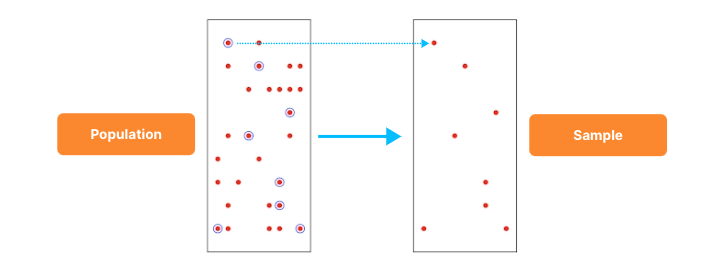

## 2. Data types

Knowing the type of data that we are dealing with is a crucial prerequisite for doing exploratory data analysis. There are two main categories: **categorical data** and **numerical data**.

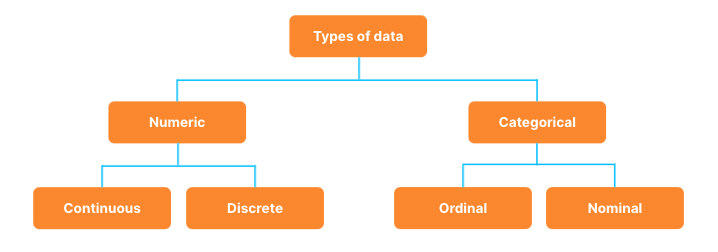

In [2]:
# numerical data = quantitative data
# ---> continuous = can take all values (weight or speed)
# ---> discrete = can only be certain values (counts of coin flip can only be an integer)

# categorical data = qualitative data
# ---> ordinal = the order has a meaning (bad, intermediate and good)
# ---> nominal = there is no order or ranking (male/female or hair color)

## 3. Histograms

### 3.1 Frequency histogram

When we think of an histogram, we usually think about this type. It has **frequency (counts)** on the y-axis.

In [3]:
# import seaborn, pandas, matplotlib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
# set figure size
plt.rcParams['figure.figsize'] = (4.8, 3)

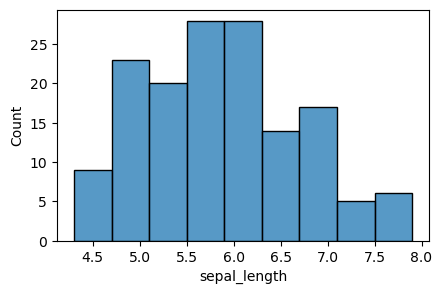

In [6]:
# histogram showing sepal_length on the x-axis and the frequency 
# (count of n. times that the sepal length occurs in the dataset) on the y-axis
sns.histplot(x='sepal_length', data=iris);

### 3.2 Relative frequency histogram

Shows the **frequency (counts)** on the y-axis **as percentages**. The total area is 1.

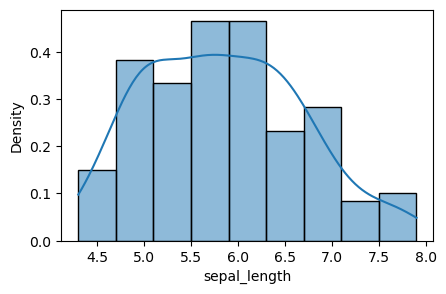

In [7]:
# frequency(counts) as % of sum(counts)
# kde = kernel density estimation
sns.histplot(x='sepal_length', data=iris, kde=True, stat='density');

**Kde takes each individual sample value and draws a small gaussian bell curve over it**, that's why it differs from the histogram bars, which does not differentiate whether the value falls close to the left, center or right of the bin.

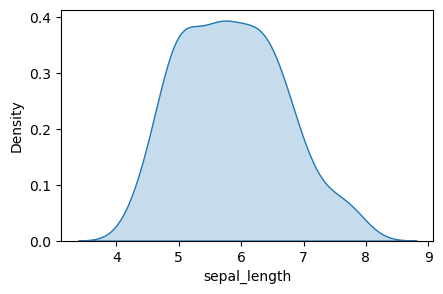

In [8]:
# kde shade
sns.kdeplot(x='sepal_length', data=iris, shade=True);

## 4. Probability distributions I

Basically the likelihood (probability) of a variable obtaining specific values.

- **Probability mass function (PMF)**: discrete variables

- **Probability density function (PDF)**: continuous variables

### 4.1 PMF (discrete)

- The values of PMF always sum up to 1

- The frequency (probability) is expressed as a fraction of size 'n' (normalization)

- PMF is plotted for discrete distributions

In [9]:
# dice roll example (multiple)

# probability of each number appearing 1/6 = 0.167
# all values have the same probability -> uniform distribution

# all potential outcomes
outcomes = [1, 2, 3, 4, 5, 6]

# dataframe
df = pd.DataFrame(outcomes, columns=['diceroll'])

# PMF
pmf = df['diceroll'].value_counts(normalize=True)
pmf

1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
Name: diceroll, dtype: float64

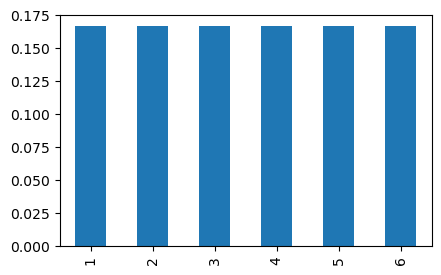

In [10]:
# PMF plot
pmf.plot(kind='bar');

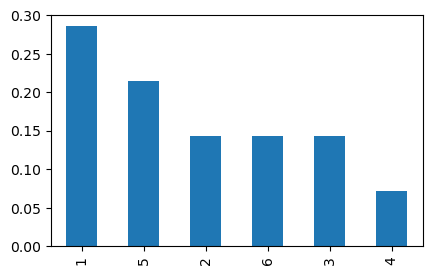

In [11]:
# we now roll the dice 14 times, here's the result
outcomes = [1, 2, 1, 1, 4, 5 ,6 ,6, 5, 5, 3, 3, 2, 1]

# df and PMF
df = pd.DataFrame(outcomes, columns=['diceroll'])
pmf = df['diceroll'].value_counts(normalize=True)
pmf.plot(kind='bar');

### 4.2 PDF (continuous)

- The probability density of x is the measure of probability per unit of x

- PDF looks for the probability of x lying within a certain range of values (area under the graph)

- The total area under PDF is always 1

- Any single point has length of 0, for a collection of points the corresponding P(density) is non-zero

- By definition Probability Density of x is the measure of probability per unit of x.

![](https://i.imgur.com/z2S5hl0.png)

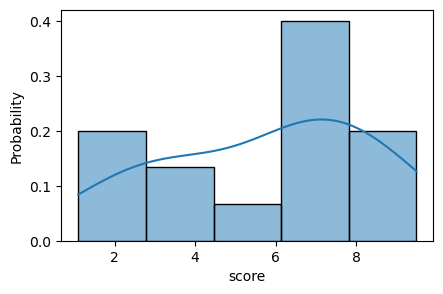

In [12]:
# exam scores example

# exam scores list
scores = [2.5, 9.5, 1.1, 4.3, 2.5, 7.8, 6.7, 8.2, 9.1, 7.7, 4.5, 3.3, 6.7, 6.5, 6.2]

# dataframe
df = pd.DataFrame(scores, columns=['score'])

# probability plot
sns.histplot(x='score', data=df, kde=True, cumulative=False, stat='probability');

### 4.3 Cumulative distribution function (CDF)

- Percentage of the data in a distribution that falls below a certain value

- CDF(x) = probability that a random value 'X' <= 'x'

- Valid for both discrete (sum of PMF until point) and continuous (are under PDF until point) variables

![](https://i.imgur.com/FI8hsRo.png)

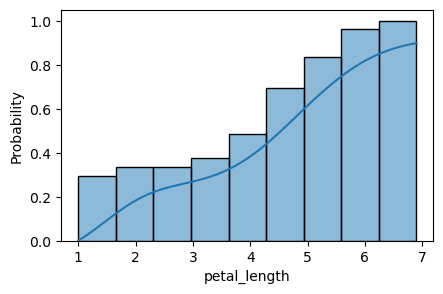

In [13]:
# petal_length example

# CDF
sns.histplot(x='petal_length', data=iris, kde=True, cumulative=True, stat='probability');

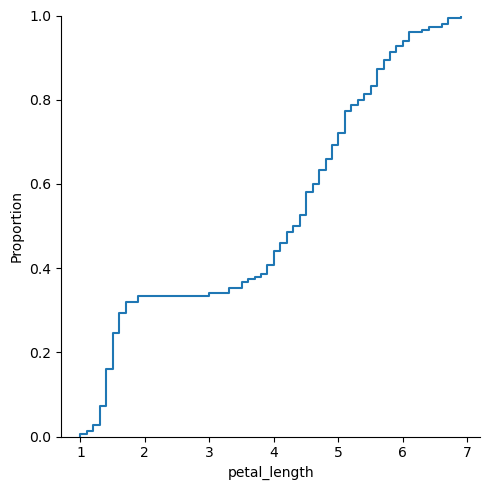

In [14]:
# get actual CDF curve
sns.displot(x='petal_length', data=iris, kind='ecdf');

## 5. Central tendencies

There are three measures for central tendencies (typical collected set of measurements):

- **(Arithmetic) Mean**: sum of all values in a set divided by the number of values
$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_{i}$$

- **Median**: value that splits the dataset arranged in increasing values in half (if even n. obs. halfway between 2 values in the middle)

- **Mode**: the value with the highest number of occurrences in a set of data (both for numeric and categorical data)

- Mean = Median = Mode -> normal distribution, otherwise skewed distribution (a > 0 right (positive skewed), a < 0 left (negative skewed))

![](https://i.imgur.com/bPUXrSE.png)

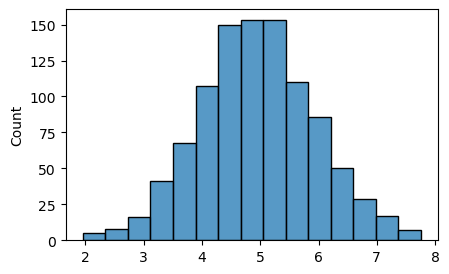

In [15]:
# symmetric distribution example

# import norm
from scipy.stats import norm

# example
mean = 5
std = 1
symmetric_distribution_values = norm.rvs(loc=mean, scale=std, size=1000, random_state=0)

# plot
sns.histplot(symmetric_distribution_values, bins=15);

In [16]:
# compute mean and median for example above

# import numpy
import numpy as np

# print mean and median
print('Mean:', np.mean(symmetric_distribution_values))
print('Median:', np.median(symmetric_distribution_values))

Mean: 4.9547432925098045
Median: 4.941971965200372


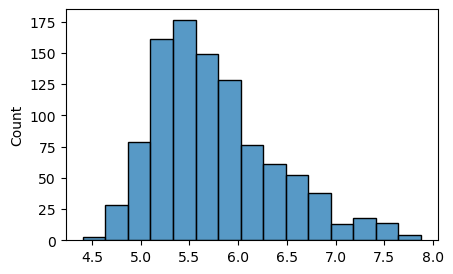

In [17]:
# right-skewed (positive) distribution

# import skewnorm
from scipy.stats import skewnorm

# example
mean = 5
std = 1
skewness = 5
right_skewed_dv = skewnorm.rvs(a=skewness, loc=mean, scale=std, size=1000, random_state=0)

# plot
sns.histplot(right_skewed_dv, bins=15);

In [18]:
# print mean and median
print('Mean:', np.mean(right_skewed_dv))
print('Median:', np.median(right_skewed_dv))

Mean: 5.762232903203987
Median: 5.653427043711051


As expected the median is smaller than the mean for right-skewed distributions.

## 6. Measures of spread

### 6.1 Variance

A small variance indicates that the data points tend to be very close to the mean (expected value). A high variance indicates that the data points are very spread out from the mean and from each other.

![](https://i.imgur.com/Htvs6LI.png)

- **Sample variance**: how the observation "vary" from the mean

$$s^{2} = \frac{\sum_{i=1}^{n}
  \left(x_{i} - \bar{x}\right)^{2}}
  {n-1}$$
  
- $x_{i}$ is observation $i$, and $n$ is number of values in a set

- Deviations are squared because otherwise +/- scores would cancel each other out

In [19]:
# example

cars = pd.read_csv('data/pw_stats_02_mtcars.csv')
cars.head()

,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
Mazda RX4,21.0,6,160.0,110,2.620,16.46,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,2.875,17.02,1,4,4
Datsun 710,22.8,4,108.0,93,2.320,18.61,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.215,19.44,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.440,17.02,0,3,2


In [20]:
# variance on displacement and max-min diff
np.var(cars['disp']), max(cars['disp']) - min(cars['disp']) 

(14880.774833984375, 400.9)

In [21]:
# variance on horsepower and max-min diff
np.var(cars['hp']), max(cars['hp']) - min(cars['hp']) 

(4553.96484375, 283)

Horsepower has a smaller variance as the range is narrower.

### 6.2 Standard deviation

- **Square root of variance**

$$s = \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \bar{x}\right)^{2}} {n-1}}$$

- Allows to get back to the original unit

- $x_{i}$ is observation $i$, and $n$ is number of values in a set

In [22]:
# std on mpg
np.std(cars['mpg'])

5.932029552301219

### 6.3 Var / std for population and sample

-  **Population standard deviation** (entire population)

$$\sigma= \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \mu{}\right)^{2}} {n}}$$

-  **Sample standard deviation** (entire population sample) also called **unbiased estimator**

$$\sigma= \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \mu{}\right)^{2}} {n-1}}$$

- Samples might not capture extreme observations, therefore underestimating the true population variance -> correct by dividing by $n-1$ instead of $n$

### 6.4 Skewness

Let's take again the image seen in central tendencies:

![](https://i.imgur.com/bPUXrSE.png)

- **Positive skewness**: a > 0, mean > median, right skewed

- **Negative skewness**: a < 0, mean < median, left skewed

- The formula to calculate the skewness is given as $$g_1=\frac{m_3}{m_2^{3/2}}$$

- $m$ are the sample moments, defined as $$ m_r = \sum\limits_{i=1}^{n} (x_i - \mu)^r / n $$

- $r$ is the moment order, $n$ is number of observations, and $x_{i}$ is an observation value.

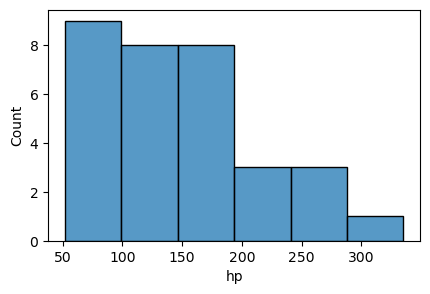

In [23]:
# display 'hp' distribution
sns.histplot(x='hp', data=cars);

In [24]:
# verify positive skewness

# import skew
from scipy.stats import skew

# skew
skew(cars['hp'])

0.7614356361333623

a > 0, mean > median, right skewed

## 7. Probability distributions II

There are different classifications of probability distributions.

### 7.1 Gaussian (normal) distribution

- Mean, median and mode are the same, the curve is symmetric around the mean and exactly half of the values are to the left and the other half to the right of the center

- Examples are people height, measurement errors, blood pressure, IQ scores, salaries or points in an exam

- Defined by two parameters: the mean and the variance or standard deviation

- The **standard normal distribution** is a special case of a normal distribution with **mean of 0 and standard deviation of 1**

- Any Gaussian can be represented as a linear sum of standard normal distributions

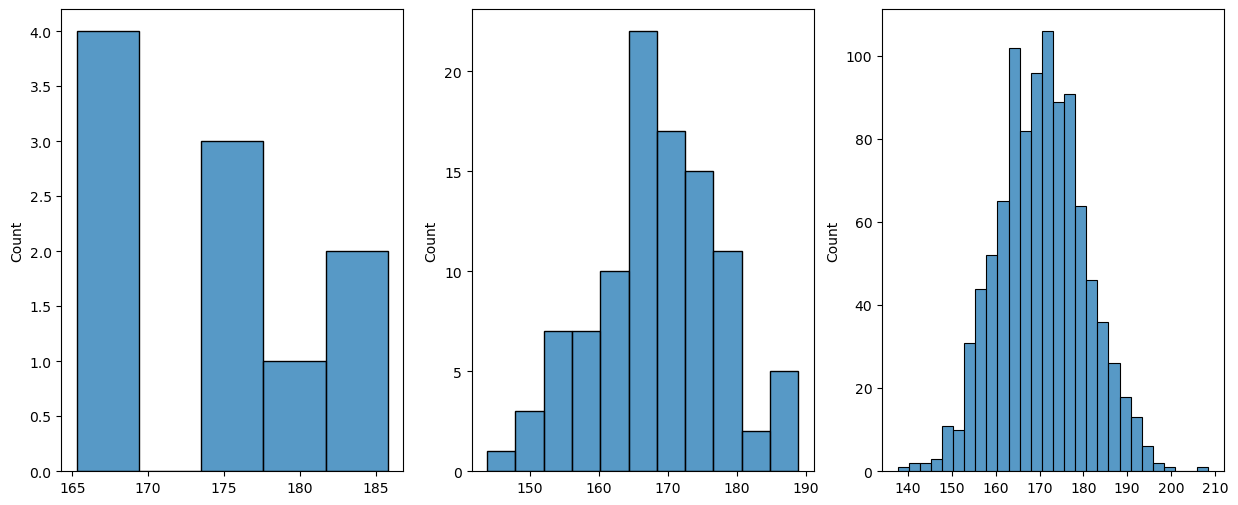

In [25]:
# generate random data with normal distribution

# set reproducible random sample
np.random.seed(42)

# generate
mean = 170
std= 10
n1 = norm.rvs(loc=mean, scale=std, size=10)
n2 = norm.rvs(loc=mean, scale=std, size=100)
n3 = norm.rvs(loc=mean, scale=std, size=1000)

# plot
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.histplot(n1, ax=ax[0])
sns.histplot(n2, ax=ax[1])
sns.histplot(n3, ax=ax[2]);

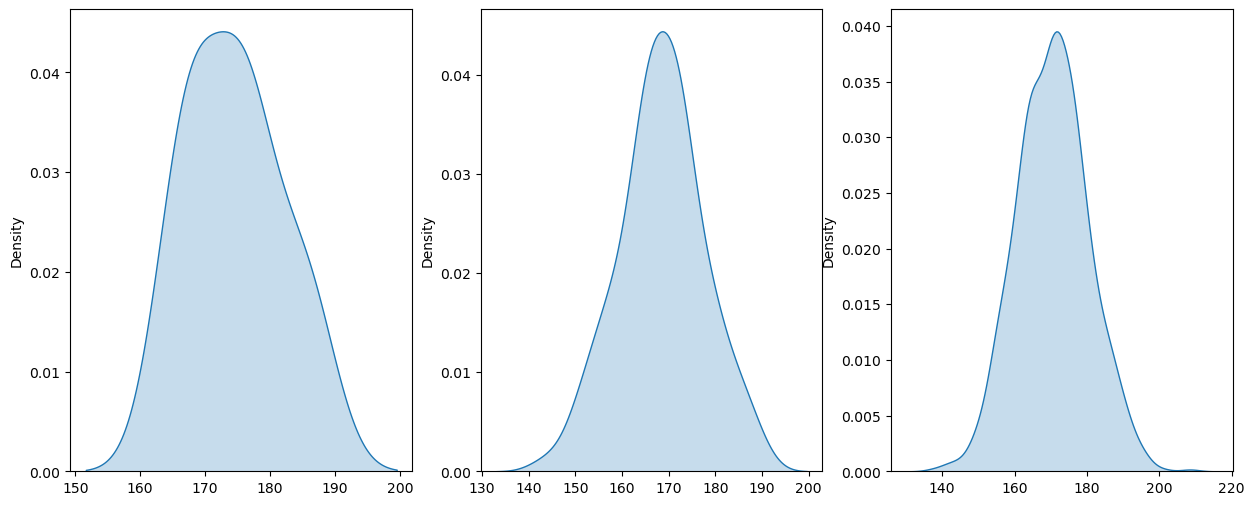

In [26]:
# plot check distribution density with seaborn
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.kdeplot(n1, ax=ax[0], shade=True)
sns.kdeplot(n2, ax=ax[1], shade=True)
sns.kdeplot(n3, ax=ax[2], shade=True);

**As sample size increases, our sample mean becomes closer and closer to the real mean.**

### 7.2 Properties of Gaussians

#### 7.2.1 z = x + y

- **The sum of two gaussians is a gaussian**

- This means that if $X \sim N(\mu_x,\sigma_x)$ and $Y \sim N(\mu_y,\sigma_y)$   

- And $Z = X + Y$

- Then $Z \sim N(\mu_x + \mu_y,  \sqrt{\sigma_x^2 + \sigma_y^2})$

In [27]:
# normal distribution mean 10 std 2
x = norm.rvs(loc=10, scale=2, size=10000, random_state=42)

# normal distribution mean 20 std 4
y = norm.rvs(loc=20, scale=4, size=10000, random_state=42)

# sum
z = x + y

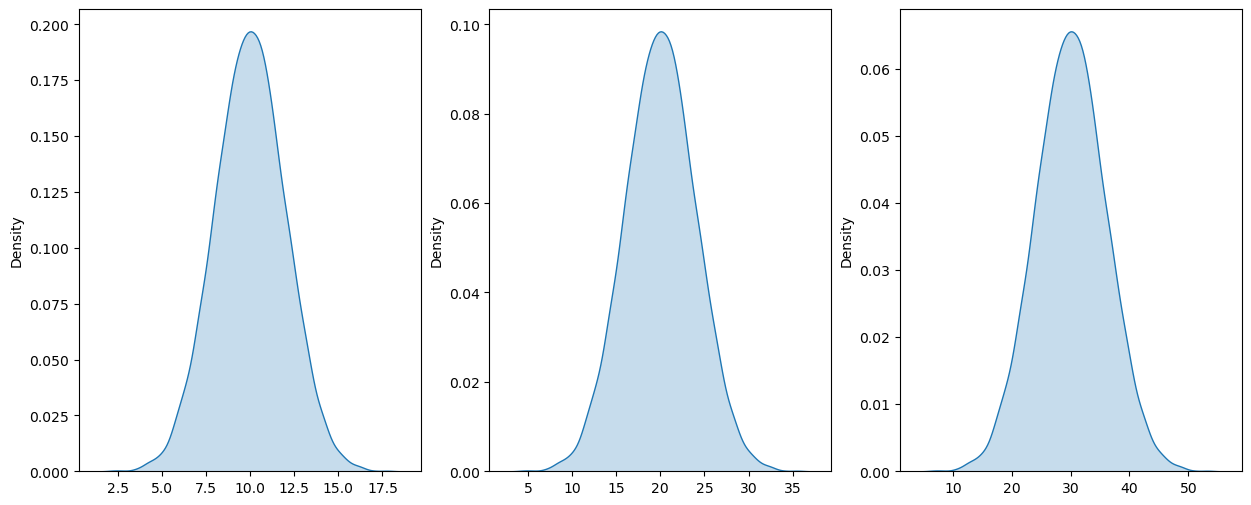

In [28]:
# plot
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.kdeplot(x, ax=ax[0], shade=True)
sns.kdeplot(y, ax=ax[1], shade=True)
sns.kdeplot(z, ax=ax[2], shade=True);

In [29]:
# check mean and std
print(np.mean(z))
print(np.std(z))

29.98718409978944
6.020473236779925


In [30]:
# example increasing sample size effect on std(z)

# n
n = [10, 100, 1000, 10000, 100000]

# results
results = []

# for loop
for sample_size in n:
    result = {}
    x = norm.rvs(loc=10, scale=2, size=sample_size, random_state=42)
    y = norm.rvs(loc=20, scale=4, size=sample_size, random_state=42)
    z = x + y
    result['sample_size'] = sample_size
    result['z_mean'] = np.mean(z)
    result['z_std'] = np.std(z)
    results.append(result)
    
# create df
result_df = pd.DataFrame(results)
result_df

,sample_size,z_mean,z_std
0,10,32.688367,4.115436
1,100,29.376921,5.421697
2,1000,30.115992,5.872357
3,10000,29.987184,6.020473
4,100000,30.005801,6.005406


#### 7.2.2 PDF

- The normal distribution has density $$f(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2}$$ 

- **$\mu$ is the mean** of the distribution and **$\sigma$ the standard deviation**

- X is the value for which we want to calculate the probability

- **The density function requires three inputs x, $\mu$ , and $\sigma$**

In [31]:
# from scipy.stats import norm

# PDF with x = 0 (data), 𝜇 = 0 (mean loc), 𝜎 = 1 (std scale)
norm.pdf(0, loc=0, scale=1)

# alternative method (loc=0, scale=1 as default)
norm.pdf(0)

0.3989422804014327

In [32]:
# PDF with mean farther from x
norm.pdf(0, loc=10, scale=1)

7.69459862670642e-23

`norm.pdf()` is often used as **likelihood function** for normal distributions.

#### 7.2.3 CDF

- CDF(x) = probability that a random value 'X' <= 'x'

- Works for normally distributed data the same way as PDF (continuous) variables

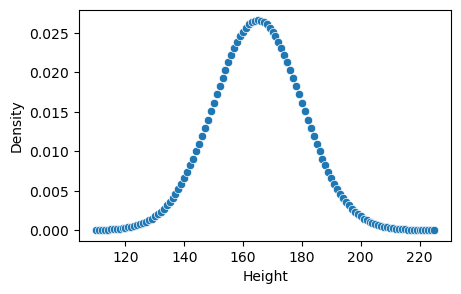

In [33]:
# cdf example

# height distribution with mean 165cm, std 15cm
mean = 165
std = 15

# check corresponding density for range of heights 110-225
height_ranges = range(110, 226)

# PDF density
pdf_densities = norm.pdf(height_ranges, loc=mean, scale=std)
ax = sns.scatterplot(x=height_ranges, y=pdf_densities)
ax.set(xlabel='Height', ylabel='Density');

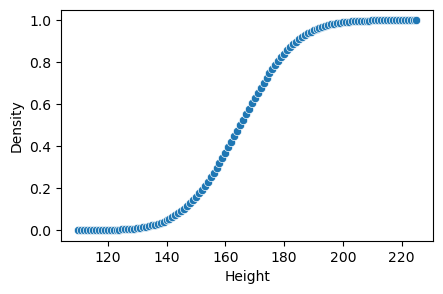

In [34]:
# CDF with norm.cdf()
cdf_densities = norm.cdf(height_ranges, loc=mean, scale=std)
ax = sns.scatterplot(x=height_ranges, y=cdf_densities)
ax.set(xlabel='Height', ylabel='Density');

The above plot shows the **probability of being a person with the height <= to a given value**.

In [35]:
# find probability for <= 190cm give height_ranges

# for each i heigh in the range, find cdf
for i in height_ranges:
    x = norm.cdf(height_ranges, loc=mean, scale=std)

# store results in dataframe
df = pd.DataFrame(list(zip(height_ranges, x)), columns = ['height', 'cdf'])

# check value for <= 190cm
df[df['height'] == 190]

,height,cdf
80,190,0.95221


In [36]:
# 95.22% of probability of a person being <= 190cm
norm.cdf(190, loc=165, scale=15)

0.9522096477271853

In [37]:
# between 170cm and 180cm (21.07%)
p_170_180 = norm.cdf(180, loc=165, scale=15) - norm.cdf(170, loc=165, scale=15)
p_170_180

0.2107860862503066

In [38]:
# above 200cm (0.98%)
p_above_200 = 1 - norm.cdf(200, loc=165, scale=15)
p_above_200

0.009815328628645315

### 7.3 Quantile function

Quantiles define a particular part of a dataset.

- Q1 includes all values that are smaller than a quarted of all values

- Q2 (50% of the total area of the distribution), Q3 (75%)

- **norm.ppf() (output = values)** is basically the inverse of **norm.cdf() (output = probabilities)**

![](https://i.imgur.com/19GdJuf.png)

In [39]:
# example

# vector of probabilities from 0 to 1 with step = 0.01
prob_ranges = np.arange(0, 1, 0.01)
prob_ranges

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

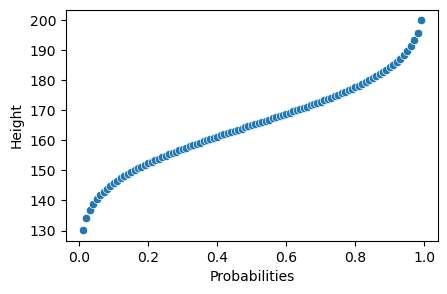

In [40]:
# PPF (convert % and returns values)

# height distribution with mean 165cm, std 15cm
mean = 165
std = 15

# PPF
cdf_inverse = norm.ppf(prob_ranges, loc=mean, scale=std)
ax = sns.scatterplot(x=prob_ranges, y=cdf_inverse);
ax.set(xlabel='Probabilities', ylabel='Height');

### 7.4 Parameters effect on normal distribution

Depending on the parameters, the gaussian distribution figure looks different.

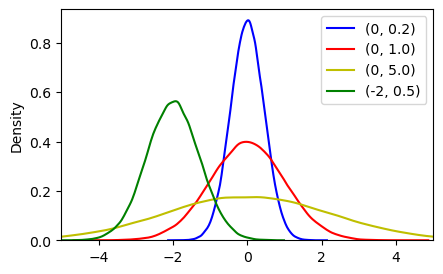

In [41]:
A = norm.rvs(size=100000, loc=0, scale=np.sqrt(0.2))
B = norm.rvs(size=100000, loc=0, scale=np.sqrt(1))
C = norm.rvs(size=100000, loc=0, scale=np.sqrt(5))
D = norm.rvs(size=100000, loc=-2, scale=np.sqrt(0.5))

fig = sns.kdeplot(A, shade=False, color="b", label='(0, 0.2)')
fig = sns.kdeplot(B, shade=False, color="r", label='(0, 1.0)')
fig = sns.kdeplot(C, shade=False, color="y", label='(0, 5.0)')
fig = sns.kdeplot(D, shade=False, color="g", label='(-2, 0.5)')
plt.xlim([-5, 5])
plt.legend()
plt.show();

The **standard normal distribution (0,1)** is displayed in red.

## 8. Multivariate gaussian distirbution

The distribution functions seen until this point were referring to a single variable. However, it is possible to estimate the probability distribution for multiple variables as well. These are called **joint probability distributions** which are, in other words, **multivariate distributions**.

- The multivariate gaussian distribution looks like

$$
p(x ; \mu, \Sigma)=\frac{1}{(2 \pi)^{n / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right)
$$

- Where $\Sigma$ = covariance matrix (often referred to as Kernel)

- With positive semi-indefinite $X = [X_1… X_n]$

- **Left**: univariate gaussian density

- **Right**: multivariate gaussian density ($X_1$ and $X_2$) variables

![](https://i.imgur.com/Mt1wXSU.png)

- Seen from above (right graph), **the heatmap shows an ellipse shape when variables are correlated**

## 9. Outliers, interquartile range, boxplots and violin plots

#### 9.1 Outliers

An outlier is an observation point that is distant from all other observations. An outlier can cause serious issues in statistical analysis. It may be due to:

- Variability in the measurement

- Experimental error

#### 9.2 Interquartile range (IQR)

IQR is an **objective method for identifying outliers**:

- The difference between the 75th percentile (Q3) and 25th percentile (Q1) gives the IQR

- Basically the range spanned by the "middle half" of the data

- **Outliers are defined as**: `< Q1 − (1.5 x IQR)` or `> Q3 + (1.5 x IQR)`

![](https://i.imgur.com/b6yJDZO.png)

In [42]:
# IQR example

# cars dataset
cars.head()

,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
Mazda RX4,21.0,6,160.0,110,2.620,16.46,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,2.875,17.02,1,4,4
Datsun 710,22.8,4,108.0,93,2.320,18.61,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.215,19.44,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.440,17.02,0,3,2


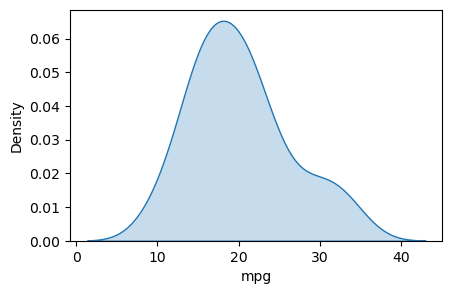

In [43]:
# check distribution for mpg
sns.kdeplot(x='mpg', data=cars, shade=True);

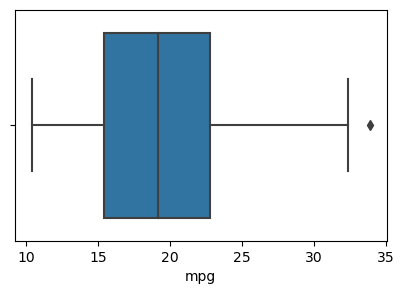

In [44]:
# boxplot visualization
sns.boxplot(x='mpg', data=cars);

In [45]:
# compute Q1 and Q3 for IQR
Q1 = np.percentile(cars['mpg'], 25)
Q3 = np.percentile(cars['mpg'], 75)
Q1, Q3

(15.425, 22.8)

In [46]:
# IQR calculation
IQR = Q3 - Q1
IQR

7.375

In [47]:
# alternative method

# import iqr
from scipy.stats import iqr

# iqr mpg column
iqr(cars['mpg'])

7.375

In [48]:
# check all quantiles
cars['mpg'].quantile(q=[0.25, 0.5, 0.75])

0.25    15.425
0.50    19.200
0.75    22.800
Name: mpg, dtype: float64

#### 9.3 Visualize outliers and IQR

The best way to visualize outliers and IQR is via **boxplot** and **violin plots**.

In [49]:
# example

# starwars dataset
starwars = pd.read_csv('data/pw_stats_01_star_wars.csv')
starwars.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human


In [50]:
# assign clean_mass_values variable to mass df columns, drop null values and check
clean_mass_values = starwars.loc[:, ['mass']].dropna()
clean_mass_values.isnull().sum()

mass    0
dtype: int64

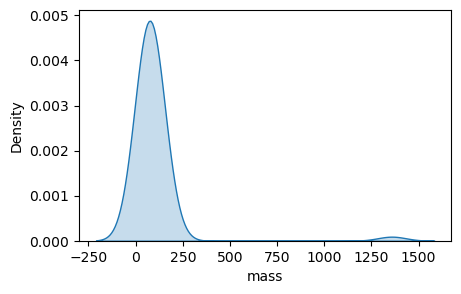

In [51]:
# plot histogram for clean_mass_values
sns.kdeplot(x='mass', data=clean_mass_values, shade=True);

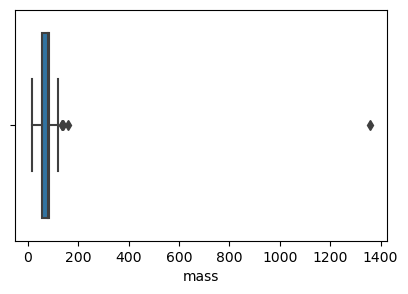

In [52]:
# plot boxplot for clean_mass_values
sns.boxplot(x='mass', data=clean_mass_values);

In [53]:
# identify Q1 Q3 and subsequetly IQR
Q1 = np.percentile(clean_mass_values['mass'], 25)
Q3 = np.percentile(clean_mass_values['mass'], 75)
IQR = Q3 - Q1
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 55.6
Q3: 84.5
IQR: 28.9


In [54]:
# find upper/lower whisper (UW/LW)
LW = Q1 - (1.5 * IQR)
UW = Q3 + (1.5 * IQR)
print(LW)
print(UW)

12.250000000000007
127.85


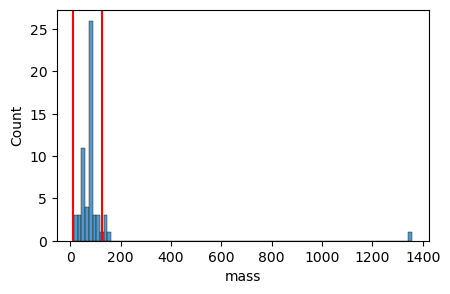

In [55]:
# visualize histogram with LW UW limits
sns.histplot(x='mass', data=clean_mass_values);
plt.axvline(LW, color='r')
plt.axvline(UW, color='r');

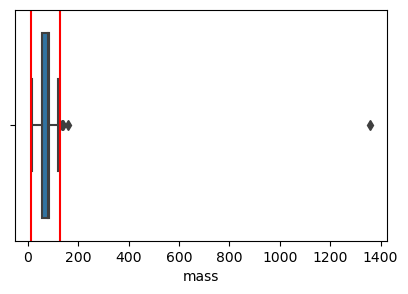

In [56]:
# alternative visualization with boxplot and LW UW limits
sns.boxplot(x='mass', data=clean_mass_values);
plt.axvline(LW, color='r')
plt.axvline(UW, color='r');

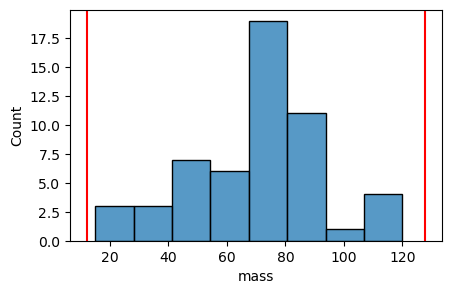

In [57]:
# remove outliers
outliers_removed = clean_mass_values[(clean_mass_values <= UW) & (clean_mass_values >= LW)]

# visualization histogram
sns.histplot(x='mass', data=outliers_removed);
plt.axvline(LW, color='r')
plt.axvline(UW, color='r');

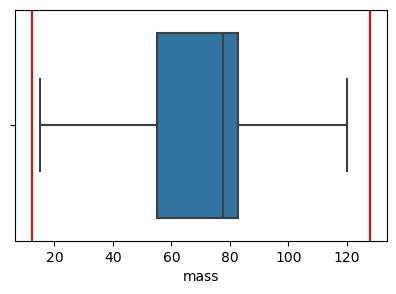

In [58]:
# outliers removes boxplot
sns.boxplot(x='mass', data=outliers_removed);
plt.axvline(LW, color='r')
plt.axvline(UW, color='r');

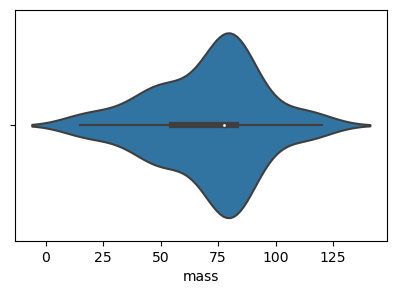

In [59]:
# violin plot alternative
sns.violinplot(x='mass', data=outliers_removed);

The **violin plot** is a mix between a **density plot and boxplot, all-in-one**.

## 10. Other common distributions

### 10.1 Bernoulli

- ($X \sim {\sf B}(1, p)$)

- Discrete probability distribution of a random variable which takes **value 1 with probability p** and **value 0 with probability q(=1-p)**

- Used for random experiments (**success/failure outcomes**)

- The PMF is given as  $$f(k;p) = \begin{cases}
        p & \text{if } k=1\\
        1-p & \text{if } k=0\\
        \end{cases}$$

- Expectation: $E(X)=p$

- Variance: $Var(X)=p(1-p)$

- **If each individual Bernoulli trial is independent**, the n. successes in a series of Bernoulli trials has a **binomial distribution**

- Binomial distribution with n = 1 (i.e. single coin toss) is basically the Bernoulli distribution

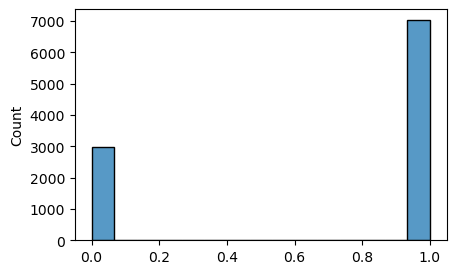

In [60]:
# bernoulli example

# generate random numbers of a Bernoulli distribution
from scipy.stats import bernoulli
bern_outcomes = bernoulli.rvs(size=10000, p=0.7)
sns.histplot(x=bern_outcomes);

In [61]:
# loc -> shift distribution for a custom mean
# scale -> shift distirbution for a custom std
# size -> numer of times to repeat the trials

### 10.2 Binomial

- $X \sim {\sf B}(n, p)$

- Trial is repeated n times

- The PMF for the binomial distribution is given as $$f(k,n,p) = Pr(X=k)= \binom{n}{k}p^{k}(1-p)^{n-k}$$

- Expectation: $E(X)=np$

- Variance: $Var(X)=np(1-p)$

![](https://i.imgur.com/NQNbmT4.png)

In [62]:
# binomial example

# 12 multiple choice questions with 5 possible answers (only one correct)
# find probability of having <= 4 correct answers if all questions are answered randomly

from scipy.stats import binom

# n = 12 -> number of questions
# p = 0.2 -> 1 out of 5 answer are correct each time (1/5 = 0.2)
# k = 4 -> answer exactly 0, 1, 2, 3, 4 questions
k0 = binom.pmf(n=12, p=0.2, k=0)
k1 = binom.pmf(n=12, p=0.2, k=1)
k2 = binom.pmf(n=12, p=0.2, k=2)
k3 = binom.pmf(n=12, p=0.2, k=3)
k4 = binom.pmf(n=12, p=0.2, k=4)
print(k0, k1, k2, k3, k4)

0.06871947673600004 0.20615843020800018 0.2834678415359999 0.2362232012799998 0.13287555071999996


In [63]:
# probability of having 4 or less correct answers
k0 + k1 + k2 + k3 + k4

0.9274445004799998

In [64]:
# alternative faster method with cumulative probability function for binomial distribution
binom.cdf(n=12, p=0.2, k=4)

0.9274445004799999

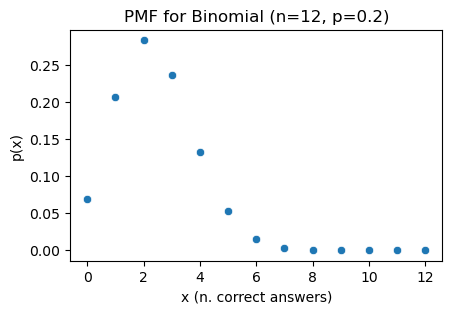

In [65]:
# plot PMF for above example

# from 0 to 12 correct answers
k_values = np.arange(0,13)
binom_pmfs = binom.pmf(n=12, p=0.2, k=k_values)
ax = sns.scatterplot(x=k_values, y=binom_pmfs)
ax.set(xlabel='x (n. correct answers)', ylabel='p(x)', title='PMF for Binomial (n=12, p=0.2)');

In [66]:
print(np.arange(0,13))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


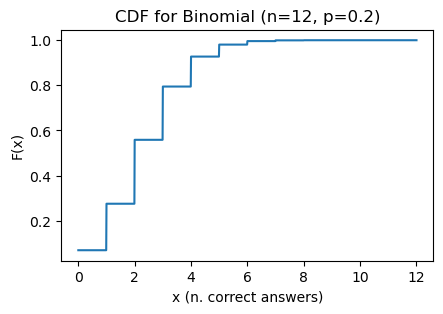

In [67]:
# plot CDF for same example

k_values = np.arange(0.00, 12.01, 0.01)
binom_pmfs = binom.cdf(n=12, p=0.2, k=k_values)
ax = sns.lineplot(x=k_values, y=binom_pmfs)
ax.set(xlabel='x (n. correct answers)', ylabel='F(x)', title='CDF for Binomial (n=12, p=0.2)');

### 10.3 Poisson

- ($X \sim {\sf P}(\lambda)$)

- Discrete probability distribution of a **given number of events occurring in a fixed period of time or space**

- Used for counts (i.e. count of fishes in a lake, numer of ill people in a town, products sold on a website

- **Mean and variance are the same**: λ

- A dispersion parameter can be used

- The PMF for the Poisson distribution is given as $$f(k;\lambda) = Pr(X=k)= \frac{\lambda^{k}e^{-\lambda}}{k!}$$

- Expectation: $E(X)=\lambda$

- Variance: $Var(X)=\lambda$

- In python mu ($\mu$) represents the lambda sign as lambda is a keyword

![](https://i.imgur.com/vyFJJiE.png)

In [68]:
# plot PMF for poisson distribution (different lambdas)

from scipy.stats import poisson

# range definition (0 to 20)
x = np.arange(0,21)

# poisson distribution for lambda = 1, 4, 10
possion_pmfs1 = poisson.pmf(k=x, mu=1)
possion_pmfs2 = poisson.pmf(k=x, mu=4)
possion_pmfs3 = poisson.pmf(k=x, mu=10)

# store results in dataframe
result_df = pd.DataFrame({
    'x': x,
    'pmf1': possion_pmfs1,
    'pmf2': possion_pmfs2,
    'pmf3': possion_pmfs3
})

# display df head
result_df.head()

,x,pmf1,pmf2,pmf3
0,0,0.367879,0.018316,0.000045
1,1,0.367879,0.073263,0.000454
2,2,0.183940,0.146525,0.002270
3,3,0.061313,0.195367,0.007567
4,4,0.015328,0.195367,0.018917


In [69]:
# melt results for pointplot
melted_df = result_df.melt('x', var_name='cols',  value_name='vals')
melted_df.head()

,x,cols,vals
0,0,pmf1,0.367879
1,1,pmf1,0.367879
2,2,pmf1,0.183940
3,3,pmf1,0.061313
4,4,pmf1,0.015328


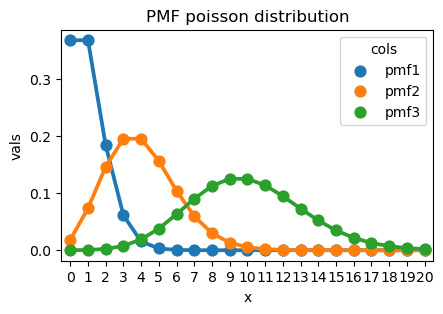

In [70]:
# plot pointplot
sns.pointplot(x='x', y='vals', data=melted_df, hue='cols').set(title='PMF poisson distribution');

In [71]:
# example

# 12 cars cross a bridge every minute on average
# what's the probability of having 17+ cats on a given minute?

# probability of having <= 16 cars
poisson.cdf(k=16, mu=12)

0.8987089925601621

In [72]:
# probability 17+ cars = 1 - (<= 16 cars)
1 - poisson.cdf(k=16, mu=12)

0.10129100743983788

In [73]:
# alternative method
poisson.sf(k=16, mu=12)

0.10129100743983793

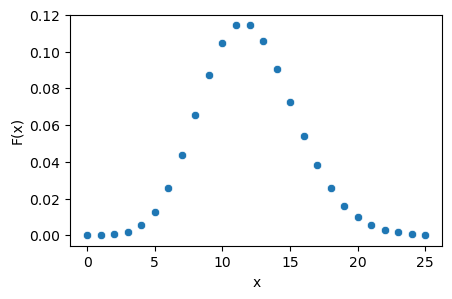

In [74]:
# plot
successes = np.arange(0, 26)
poisson_pmfs = poisson.pmf(k=successes, mu=12)

ax = sns.scatterplot(x=successes, y=poisson_pmfs)
ax.set(xlabel='x', ylabel='F(x)');

### 10.4 Exponential

- $X \sim {\sf Exp}(\lambda)$

- Represents the **time between events** in a Poisson process

- Can be interpreted as failure rate, probability of success over time,t

- **One parameter distribution with mean = λ (sometimes 1/λ is used)**

- Examples: amount of time from now until an earthquake occurs, amount of time a car battery lasts

- The PDF for the Poisson distribution is given as

$$f(x;\lambda) = \begin{cases}
        \lambda e ^{-\lambda x}& \text{for } x\ge0\\
        0 & \text{for } x<0\\
        \end{cases}$$

- Expectation: $E(X)=1/\lambda$

- Variance: $Var(X)=1/{\lambda^2}$

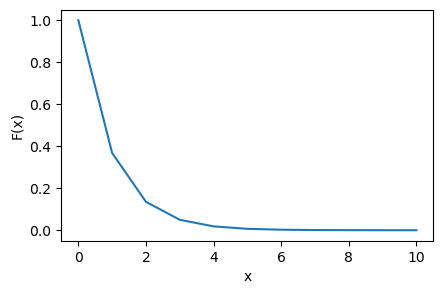

In [75]:
from scipy.stats import expon

# parameter 'scale' -> 1/lambda

x = np.arange(0, 11)
exp_pdfs = expon.pdf(x, scale=1)
ax = sns.lineplot(x=x, y=exp_pdfs)
ax.set(xlabel='x', ylabel='F(x)');

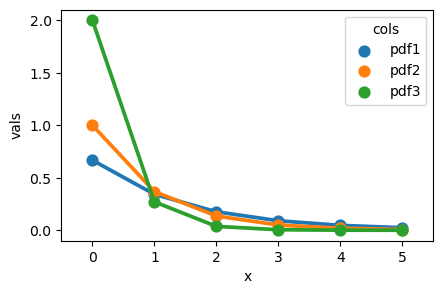

In [76]:
# example for different lambda values

x = np.arange(0, 6)
exp_pdfs1 = expon.pdf(x, scale=1.5)
exp_pdfs2 = expon.pdf(x, scale=1)
exp_pdfs3 = expon.pdf(x, scale=0.5)

result_df = pd.DataFrame({
    'x': x,
    'pdf1': exp_pdfs1,
    'pdf2': exp_pdfs2,
    'pdf3': exp_pdfs3
})

melted_df = result_df.melt('x', var_name='cols',  value_name='vals')

sns.pointplot(x='x', y='vals', data=melted_df, hue='cols');

In [77]:
# find probability of a customer checkout being completed by the cashied in less than 2 minutes
# mean checkout time (lambda) = 3 minutes
expon.cdf(2, scale=3)

0.486582880967408

In [ ]:
# still back to basics on datacamp